In [1]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm joblib imbalanced-learn

  Using cached pandas-3.0.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.4.2-cp313-cp313-win_amd64.whl.metadata (6.6 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached xgboost-3.1.3-py3-none-win_amd64.whl.metadata (2.0 kB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached imbalanced_learn-0.14.1-py3-none-any.whl.metadata (8.9 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached scipy-1.17.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
 


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


INFO:training.data_loader:Loading data from h:\AI-ML\cloud-cost-mlops\notebooks\..\data\raw\WA_Fn-UseC_-Telco-Customer-Churn.csv
INFO:training.data_loader:Data loaded successfully. Shape: (7043, 21)
INFO:training.data_loader:Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


TELCO CUSTOMER CHURN DATASET SUMMARY

Dataset Shape: 7043 rows × 21 columns
Memory Usage: 6.82 MB
Duplicate Rows: 0

--------------------------------------------------------------------------------
TARGET VARIABLE (Churn)
--------------------------------------------------------------------------------
No: 5,174 (73.46%)
Yes: 1,869 (26.54%)

Churn Rate: 26.54%

--------------------------------------------------------------------------------
MISSING VALUES
--------------------------------------------------------------------------------
No missing values found

--------------------------------------------------------------------------------
DATA TYPES
--------------------------------------------------------------------------------

str (18 columns):
  - customerID
  - gender
  - Partner
  - Dependents
  - PhoneService
  ... and 13 more

int64 (2 columns):
  - SeniorCitizen
  - tenure

float64 (1 columns):
  - MonthlyCharges

First 5 rows of the dataset:
Statistical Summary:
Data Info:
<cl

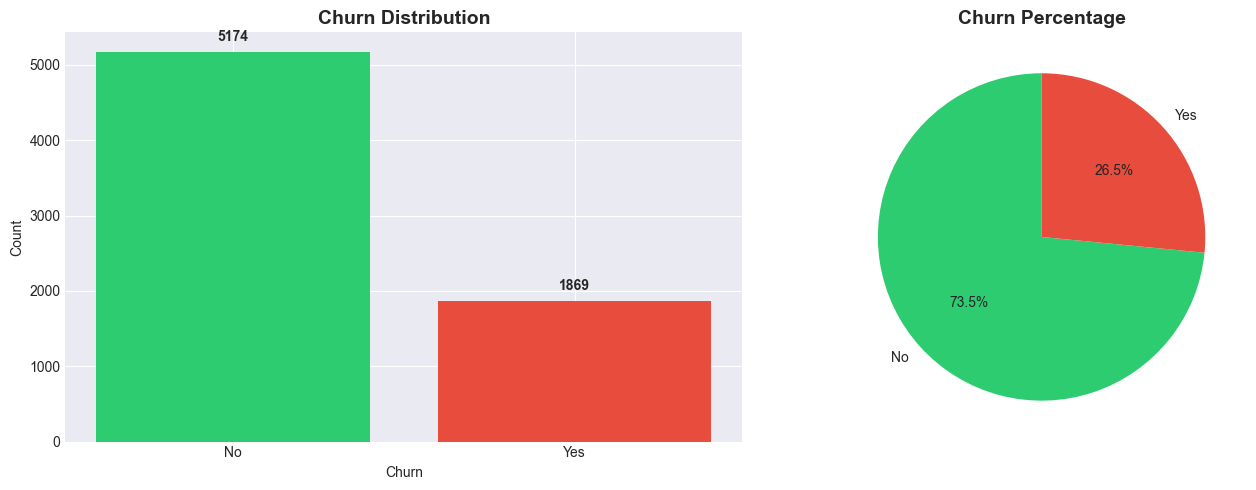


Churn Rate: 26.54%
Class Imbalance Ratio: 2.77:1
Numerical features: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


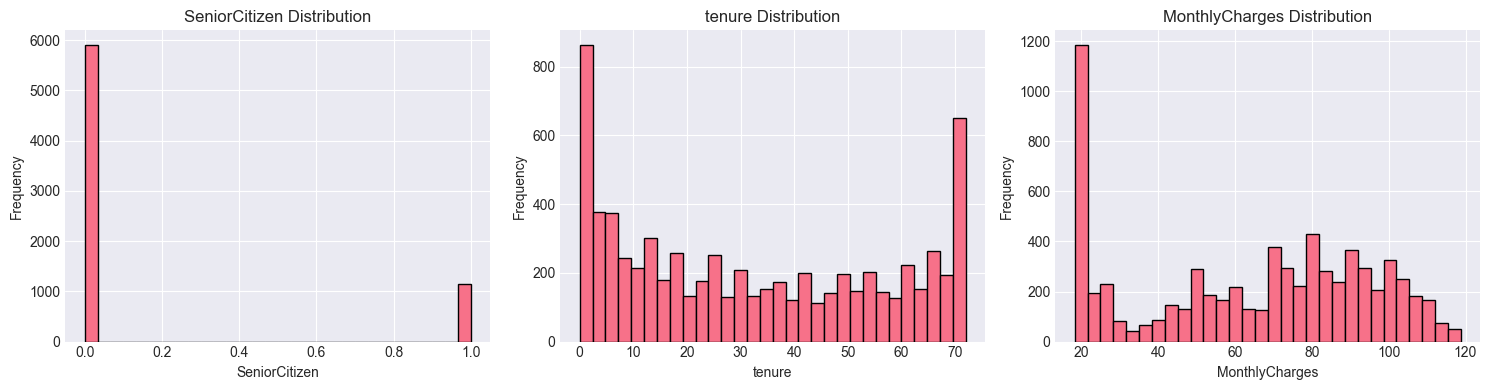

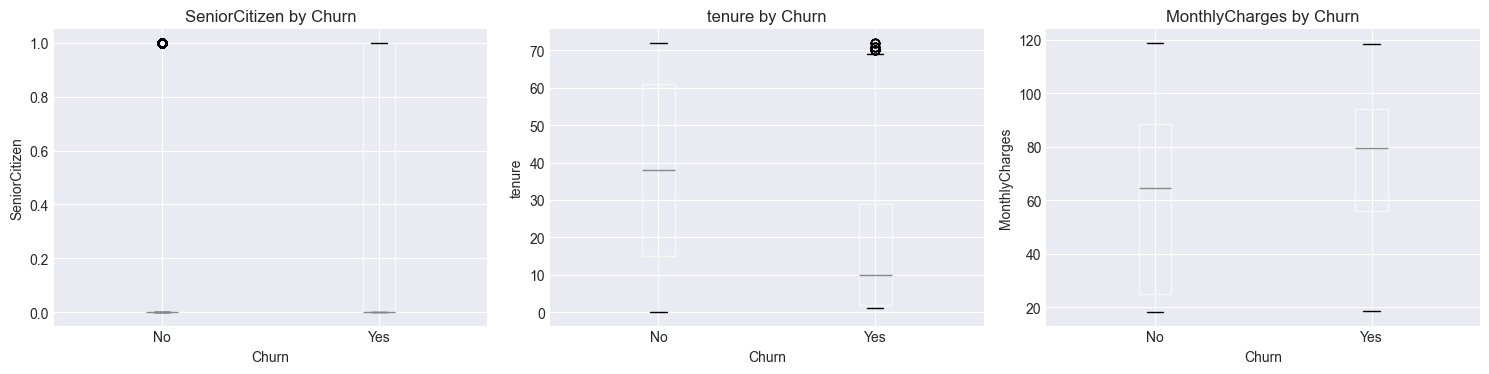


Categorical features (16): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']

gender: 2 unique values
gender
Male      3555
Female    3488
Name: count, dtype: int64
--------------------------------------------------

Partner: 2 unique values
Partner
No     3641
Yes    3402
Name: count, dtype: int64
--------------------------------------------------

Dependents: 2 unique values
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
--------------------------------------------------

PhoneService: 2 unique values
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
--------------------------------------------------

MultipleLines: 3 unique values
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
---------

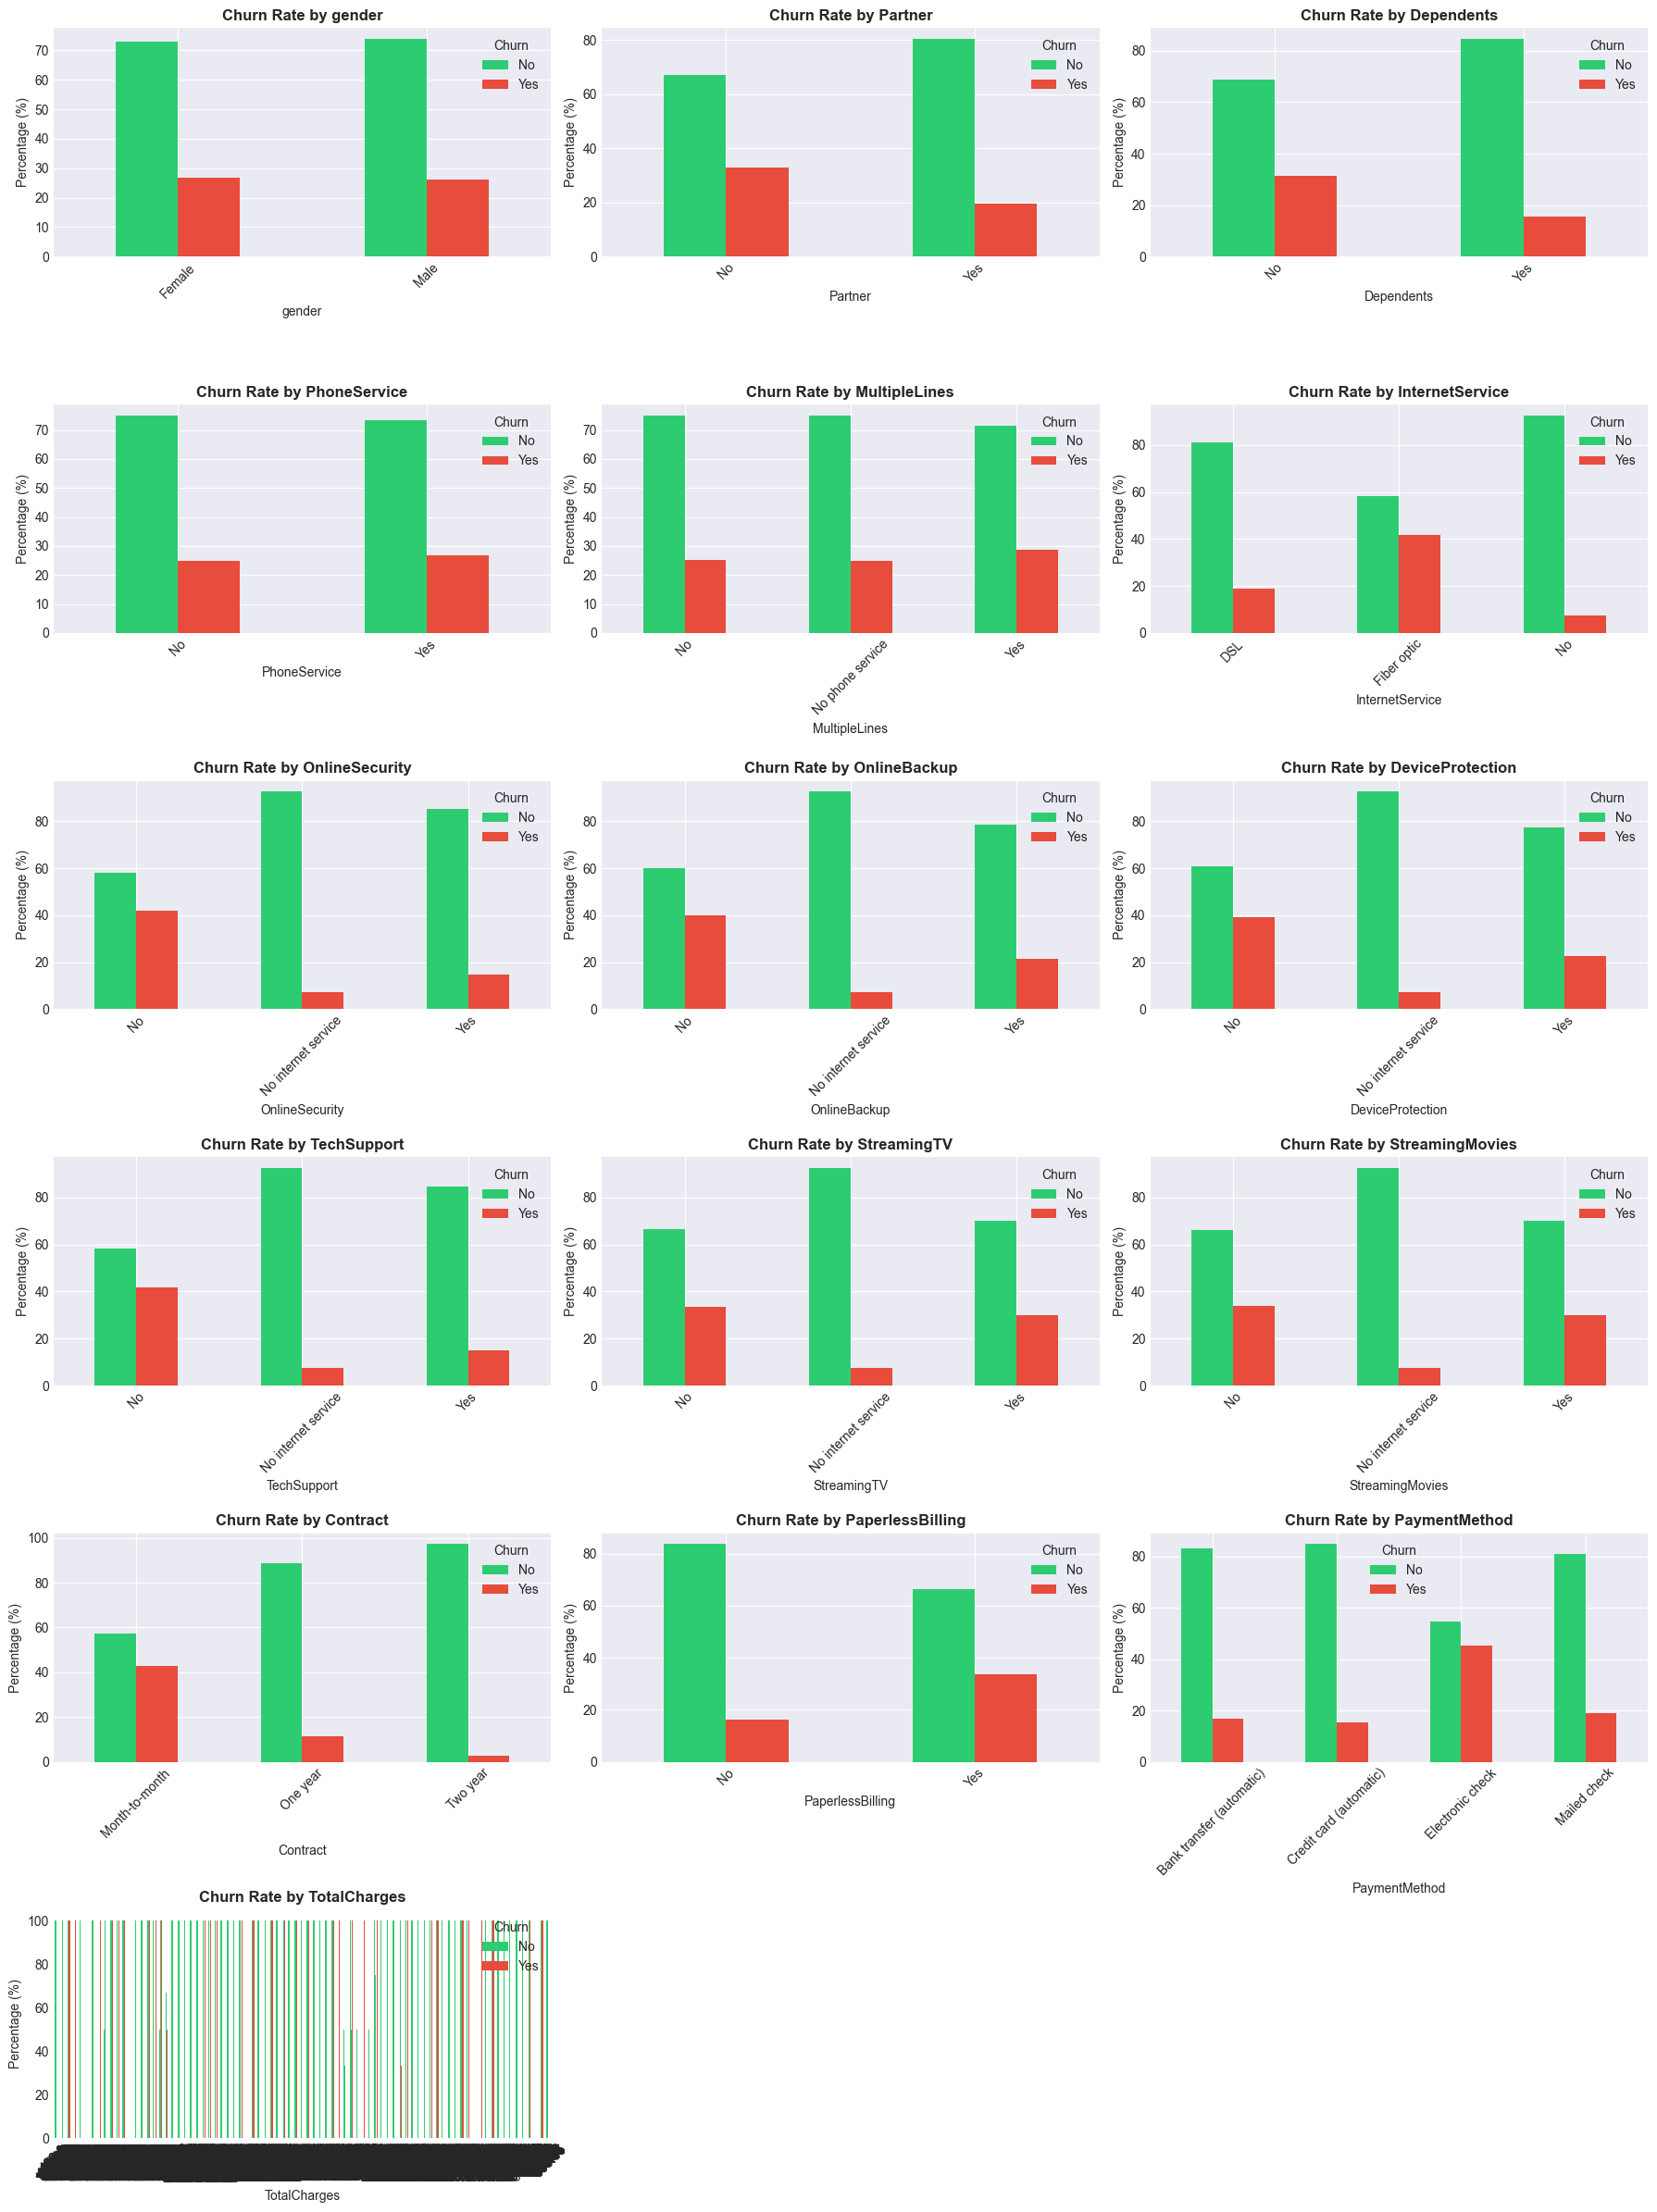

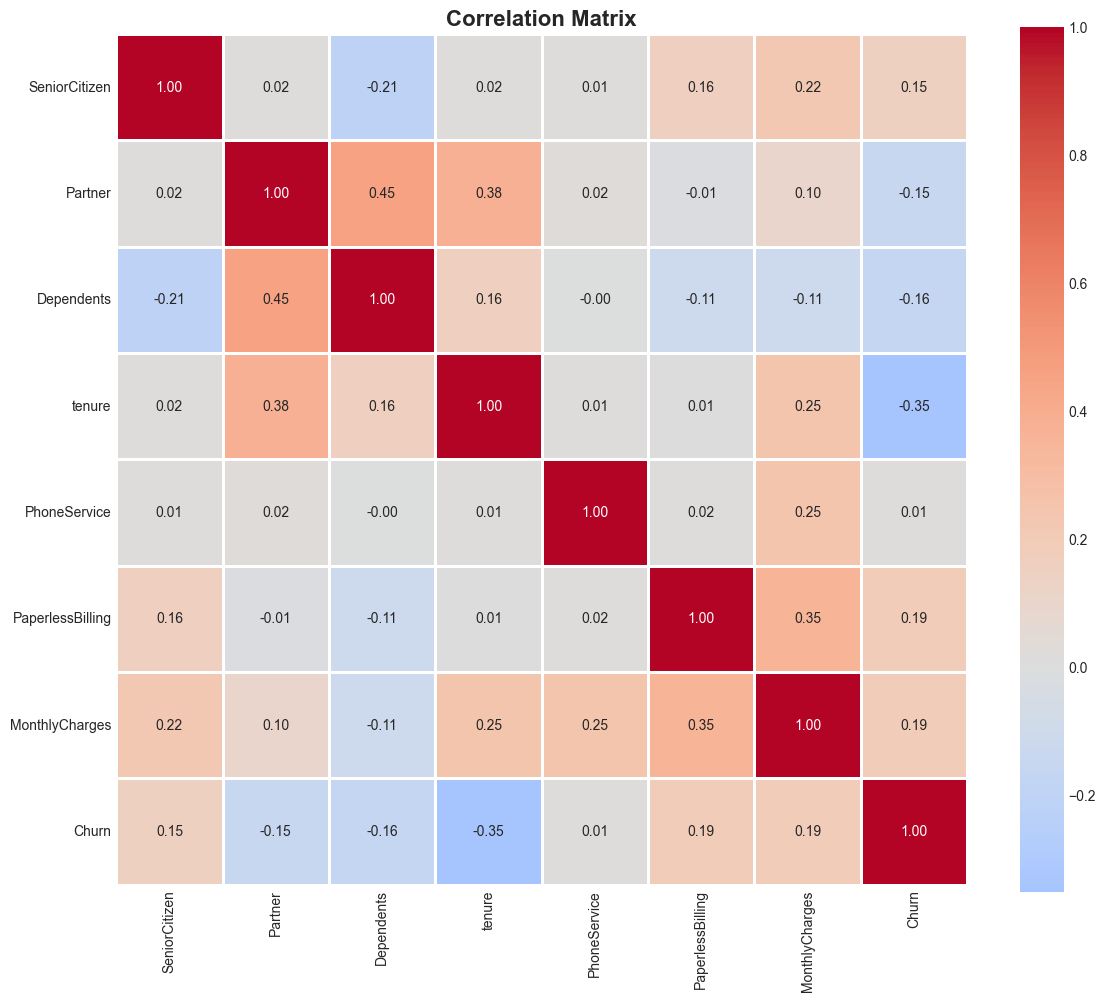


Correlation with Churn:
Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
Name: Churn, dtype: float64
KEY INSIGHTS FROM DATA EXPLORATION

1. DATASET OVERVIEW:
   - Total customers: 7,043
   - Features: 19 (excluding customerID and Churn)
   - Churn rate: 26.54%

2. DATA QUALITY:
   - No missing values
   - Duplicates: 0

3. CLASS IMBALANCE:
   - Imbalance ratio: 2.77:1
   - SIGNIFICANT IMBALANCE - will need to handle during training

4. FEATURE TYPES:
   - Numerical: 3
   - Categorical: 16



In [2]:
"""
Jupyter Notebook Content - Copy each cell separately
"""

# Cell 1: Imports
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from training.data_loader import TelcoDataLoader

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Cell 2: Load Data
loader = TelcoDataLoader()
df = loader.load_data()
loader.print_data_summary()

# Cell 3: Display First Rows
print("First 5 rows of the dataset:")
df.head()

# Cell 4: Basic Statistics
print("Statistical Summary:")
df.describe()

# Cell 5: Check Data Types and Issues
print("Data Info:")
df.info()

# Check for any data type issues
print("\nChecking TotalCharges column:")
print(df['TotalCharges'].dtype)
print("\nSample values:")
print(df['TotalCharges'].head(20))

# Cell 6: Target Variable Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Churn distribution
churn_counts = df['Churn'].value_counts()
axes[0].bar(churn_counts.index, churn_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')

# Churn percentage
churn_pct = df['Churn'].value_counts(normalize=True) * 100
axes[1].pie(churn_pct.values, labels=churn_pct.index, autopct='%1.1f%%', 
            colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Churn Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nChurn Rate: {(df['Churn'] == 'Yes').mean():.2%}")
print(f"Class Imbalance Ratio: {(df['Churn'] == 'No').sum() / (df['Churn'] == 'Yes').sum():.2f}:1")

# Cell 7: Numerical Features Distribution
numerical_features = loader.get_numerical_features()
print(f"Numerical features: {numerical_features}")

fig, axes = plt.subplots(1, len(numerical_features), figsize=(15, 4))
for idx, col in enumerate(numerical_features):
    df[col].hist(bins=30, ax=axes[idx], edgecolor='black')
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Cell 8: Numerical Features vs Churn
fig, axes = plt.subplots(1, len(numerical_features), figsize=(15, 4))
for idx, col in enumerate(numerical_features):
    df.boxplot(column=col, by='Churn', ax=axes[idx])
    axes[idx].set_title(f'{col} by Churn')
    axes[idx].set_xlabel('Churn')
    axes[idx].set_ylabel(col)
    
plt.suptitle('')
plt.tight_layout()
plt.show()

# Cell 9: Categorical Features Analysis
categorical_features = loader.get_categorical_features()
print(f"\nCategorical features ({len(categorical_features)}): {categorical_features}")

# Show unique values for each categorical feature
for col in categorical_features:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())
    print("-" * 50)

# Cell 10: Categorical Features vs Churn (Part 1)
n_cols = 3
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(categorical_features[:len(axes)]):
    churn_data = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    churn_data.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'Churn Rate by {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(title='Churn')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide empty subplots
for idx in range(len(categorical_features), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# Cell 11: Correlation Analysis
# Convert categorical to numeric for correlation
df_numeric = df.copy()
df_numeric['Churn'] = (df_numeric['Churn'] == 'Yes').astype(int)

# Convert Yes/No columns to binary
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    if col in df_numeric.columns:
        df_numeric[col] = (df_numeric[col] == 'Yes').astype(int)

# Select only numeric columns
numeric_df = df_numeric.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation with target
print("\nCorrelation with Churn:")
churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)
print(churn_corr)

# Cell 12: Key Insights Summary
print("=" * 80)
print("KEY INSIGHTS FROM DATA EXPLORATION")
print("=" * 80)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total customers: {len(df):,}")
print(f"   - Features: {len(df.columns) - 2} (excluding customerID and Churn)")
print(f"   - Churn rate: {(df['Churn'] == 'Yes').mean():.2%}")

print("\n2. DATA QUALITY:")
missing_info = loader.get_data_info()
if any(v > 0 for v in missing_info['missing_values'].values()):
    print("   - Missing values detected - needs handling")
else:
    print("   - No missing values")
print(f"   - Duplicates: {missing_info['duplicates']}")

print("\n3. CLASS IMBALANCE:")
class_ratio = (df['Churn'] == 'No').sum() / (df['Churn'] == 'Yes').sum()
print(f"   - Imbalance ratio: {class_ratio:.2f}:1")
if class_ratio > 2:
    print("   - SIGNIFICANT IMBALANCE - will need to handle during training")

print("\n4. FEATURE TYPES:")
print(f"   - Numerical: {len(numerical_features)}")
print(f"   - Categorical: {len(categorical_features)}")

print("\n" + "=" * 80)